In [1]:
#import required packages
#basics
import pandas as pd
import numpy as np

#stats
from scipy import sparse
import scipy.stats as ss

#viz
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud ,STOPWORDS
from PIL import Image

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer

#Models
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
# read yelp.csv into a DataFrame
yelp = pd.read_csv('reviews.csv')

In [18]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [19]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [20]:
# Total # of restaurants

yelp.business_id.nunique()

4117

In [21]:
# Total # of users
yelp.user_id.nunique()

6325

In [22]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [23]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
yelp.sort_values(by='stars', ascending=False)

,review_id,stars,text,cool,useful,funny
0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,2,5,0
4953,EQu1fQG8Qd9QJ5Jw4-u90A,5,"Ted's rules. Great char-grilled hot dogs, kil...",0,0,0
4972,Kw3g_nAZEW3bsKxW_bC1aA,5,Terrific food and service. Happy hour from 3-6...,0,0,0
4968,lfP-h9GlmgqqAlqcPgvXhQ,5,Excellent.,0,0,0
4967,TDgU176i8wejwZ-tBQLrxA,5,Love Bakers. I live in Glendale an it is worth...,0,1,0
...,...,...,...,...,...,...
7109,KR_8Vgo85xgwxG5XmFj7ZQ,1,"Place is alright but for the waitress, poor se...",0,0,0
8582,5lp7FVVwKZieGOClKlclqQ,1,My husband and I heard great reviews about thi...,0,0,0
8174,Uiif0BxCoTm0Ztr8ONNWkw,1,I don't expect much when grabbing lunch at a m...,3,3,1
9446,pa_qmlMbYpFfU407fGDVDg,1,Terrible experience here. They cut up my foot ...,0,0,0


In [24]:
yelp.stars.value_counts(normalize=True)

stars
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: proportion, dtype: float64

In [25]:
yelp.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [13]:
yelp.funny.value_counts()

funny
0     7013
1     1632
2      603
3      271
4      161
5       90
6       68
7       34
8       25
9       21
10      18
11      14
12      11
15       5
16       5
20       5
17       4
13       3
14       3
24       2
22       2
19       2
18       2
21       1
27       1
23       1
30       1
39       1
57       1
Name: count, dtype: int64

In [26]:
yelp.cool.value_counts()

cool
0     6290
1     1955
2      749
3      396
4      209
5      119
6       88
7       41
8       31
10      30
11      17
9       15
13      14
14      10
12       9
16       6
17       5
15       5
18       1
22       1
28       1
21       1
19       1
20       1
23       1
77       1
27       1
38       1
32       1
Name: count, dtype: int64

In [27]:
yelp.useful.value_counts()

useful
0     4130
1     2848
2     1323
3      711
4      335
5      222
6      114
7       91
8       52
9       38
10      29
12      20
11      19
15      17
13      12
14       8
19       6
16       6
17       5
18       5
20       2
28       1
23       1
24       1
76       1
31       1
38       1
30       1
Name: count, dtype: int64

In [28]:
yelp.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [29]:
yelp.groupby('business_id').agg({'text': 'count', 'stars': 'mean'}).reset_index().sort_values(by=['text', 'stars'], ascending = False)

,business_id,text,stars
0,#NAME?,176,3.789773
1310,JokKtdXU7zXHcr20Lrk29A,37,4.513514
3325,ntN85eu27C04nwyPa8IHtw,37,3.945946
2900,hW0Ne_HTHEAgGF1rAdmR-g,34,3.264706
2167,WNy1uzcmm_UHmTyR--o5IA,32,4.343750
...,...,...,...
4066,zAoFrUwRVdSrvYWNB5e5Jw,1,1.000000
4080,zRqU9_TTVNSo9d23fL8qgQ,1,1.000000
4084,zWl6V8-L6m9Xfmpq_MqkKw,1,1.000000
4091,zht8__JJoxkozBhf_vuKYg,1,1.000000


In [30]:
yelp.groupby('business_id').stars.agg(['mean', 'count']).reset_index().sort_values(by='count', ascending=False)

,business_id,mean,count
0,#NAME?,3.789773,176
1310,JokKtdXU7zXHcr20Lrk29A,4.513514,37
3325,ntN85eu27C04nwyPa8IHtw,3.945946,37
2900,hW0Ne_HTHEAgGF1rAdmR-g,3.264706,34
2167,WNy1uzcmm_UHmTyR--o5IA,4.343750,32
...,...,...,...
1778,QoTOOE-gVN4ELZU373qZxQ,5.000000,1
1779,Qr232ykh-d73aAKQqfdu8Q,5.000000,1
1785,R0TyGazD5a0Wc7QkIAUTJQ,5.000000,1
1786,R1RjCYfRZm9inTDQVVpUGQ,5.000000,1


In [31]:
yelp.groupby('user_id').review_id.count().reset_index().sort_values(by='review_id', ascending=False).iloc[0]

user_id      #NAME?
review_id       121
Name: 0, dtype: object

In [32]:
yelp[['useful', 'funny', 'cool']].corr()

,useful,funny,cool
useful,1.000000,0.723406,0.887102
funny,0.723406,1.000000,0.764342
cool,0.887102,0.764342,1.000000


In [33]:
# Which restaurants received highest positive reviews (>=4)
positive_reviews = yelp[yelp['stars'] >= 4] \
    .groupby('business_id') \
    .size() \
    .reset_index(name='positive_review_count') \
    .sort_values(by='positive_review_count', ascending=False)

positive_reviews.head()

,business_id,positive_review_count
0,#NAME?,118
1018,JokKtdXU7zXHcr20Lrk29A,35
1650,WNy1uzcmm_UHmTyR--o5IA,28
2520,ntN85eu27C04nwyPa8IHtw,25
1575,V1nEpIRmEa1768oj_tuxeQ,25


In [34]:
# Which restaurants received highest bad reviews (<=2)
negative_reviews = yelp[yelp['stars'] <= 2] \
    .groupby('business_id') \
    .size() \
    .reset_index(name='negative_review_count') \
    .sort_values(by='negative_review_count', ascending=False)

negative_reviews.head()

,business_id,negative_review_count
0,#NAME?,30
1098,rIonUa02zMz_ki8eF-Adug,7
905,hW0Ne_HTHEAgGF1rAdmR-g,7
1032,nfyqtEoufkhjv97IueK7Ow,6
1127,sbsFamEj5wDxNAjUKrMcSw,6


In [35]:
# Are there any paid reviews?
user_review_counts = yelp['user_id'].value_counts()
one_time_users = user_review_counts[user_review_counts == 1].index

# Reviews from users who posted only once
yelp[yelp['user_id'].isin(one_time_users)].head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
5,#NAME?,12/13/2007,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
7,hW0Ne_HTHEAgGF1rAdmR-g,7/12/2012,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0


In [36]:
df = yelp

In [37]:
df.text.apply(lambda x: len(str(x))) # .apply-> udf or a preexisting function
df.text.apply(len)

0        889
1       1345
2         76
3        419
4        469
        ... 
9995     668
9996     881
9997    1425
9998     880
9999     461
Name: text, Length: 10000, dtype: int64

In [38]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
eng_stopwords = stopwords.words('english')

In [40]:
df['text'] = df['text'].astype(str)
df['count_sent']=df["text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [41]:
#Word count in each comment:
df['count_word']=df["text"].apply(lambda x: len(str(x).split()))

In [42]:
df['count_word']

0       155
1       257
2        16
3        76
4        86
       ... 
9995    120
9996    161
9997    262
9998    147
9999     79
Name: count_word, Length: 10000, dtype: int64

In [43]:
#Unique word count
df['count_unique_word']=df["text"].apply(lambda x: len(set(str(x).split())))

In [47]:
pos_family = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def check_pos_tag(x, flag):
    cnt = 0
    try:
        wiki = textblob.TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_family[flag]:
                cnt += 1
    except:
        pass
    return cnt

df['noun_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'noun'))
df['verb_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'verb'))
df['adj_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adj'))
df['adv_count']  = df['text'].apply(lambda x: check_pos_tag(x, 'adv'))
df['pron_count'] = df['text'].apply(lambda x: check_pos_tag(x, 'pron'))

In [48]:
from textblob import TextBlob

In [49]:
yelp.text[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [50]:
TextBlob(yelp.text[0]).sentiment.polarity

0.40246913580246907

In [51]:
yelp.text[1747]

"This dog park gets one star.Why?Because the last time I went,some piece of shit broke into just about every car in the parking lot to steal whatever they could.So much broken glass from side windows everywhere.\nIt used to be okay before this incident,but a busy parking lot in borad daylight and some vulture lies in wait?\nYeah,I'm done here."

In [52]:
TextBlob(yelp.text[1747]).sentiment.polarity

-1.6653345369377347e-17

In [53]:
# With the polarity, there are chances to fetch some bad results

yelp['sentiment_score'] = yelp["text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [54]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,count_sent,count_word,count_unique_word,count_letters,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,7,155,110,889,0,0,0,0,0,0.402469
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,5,257,159,1345,0,0,0,0,0,0.229773
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,1,16,16,76,0,0,0,0,0,0.566667
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,5,76,61,419,0,0,0,0,0,0.608646
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,3,86,72,469,0,0,0,0,0,0.468125


In [55]:
yelp['sentiment'] = np.where(yelp.sentiment_score>0.05,'Positive',np.where(yelp.sentiment_score<-0.05, 'Negative', 'Neutral'))

In [56]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,...,count_word,count_unique_word,count_letters,noun_count,verb_count,adj_count,adv_count,pron_count,sentiment_score,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,...,155,110,889,0,0,0,0,0,0.402469,Positive
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,...,257,159,1345,0,0,0,0,0,0.229773,Positive
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,...,16,16,76,0,0,0,0,0,0.566667,Positive
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,...,76,61,419,0,0,0,0,0,0.608646,Positive
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,...,86,72,469,0,0,0,0,0,0.468125,Positive


In [57]:
pd.crosstab(yelp.stars, yelp.sentiment)

sentiment,Negative,Neutral,Positive
stars,,,
1,250,238,261
2,126,201,600
3,49,164,1248
4,50,135,3341
5,42,118,3177


In [58]:
negativesent_positscore = yelp[((yelp.sentiment == 'Negative') & (yelp.stars >=4))]

In [59]:
negativesent_positscore.text

24      I love this place! I have been coming here for...
92      This is a little hockey dive-bar located in th...
350     I've been coming here since the 70's when it w...
390     RIP AZ Coffee Connection.  :(  I stopped by tw...
571     Stop everything you're doing and go get one of...
                              ...                        
9737    I really like Maizie's, but unfortunately will...
9798    I came, I saw, I conquered. \n\nWould get five...
9809    I have to tell you....\n\nI had their Jerk Chi...
9897    Rivas helped me get through numerous late nigh...
9948                             No more dinner hours! :(
Name: text, Length: 92, dtype: object

In [60]:
negativesent_positscore.text[24]

"I love this place! I have been coming here for ages.\nMy favorites: Elsa's Chicken sandwich, any of their burgers, dragon chicken wings, china's little chicken sandwich, and the hot pepper chicken sandwich. The atmosphere is always fun and the art they display is very abstract but totally cool!"

In [61]:
Positive_review = yelp.text[yelp.stars>=4]
Negative_review = yelp.text[yelp.stars<4]

In [62]:
stop = set(nltk.corpus.stopwords.words('english'))

#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.replace('return factor',"return factor").replace('cons','')
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    
    return(text)

In [63]:
import string
def pre_process(text):
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    return(text)


In [64]:
Positive_review = Positive_review.apply(lambda x: clean_text(x))
Positive_review = pre_process(Positive_review)

In [65]:
Negative_review = Negative_review.apply(lambda x: clean_text(x))
Negative_review=pre_process(Negative_review)

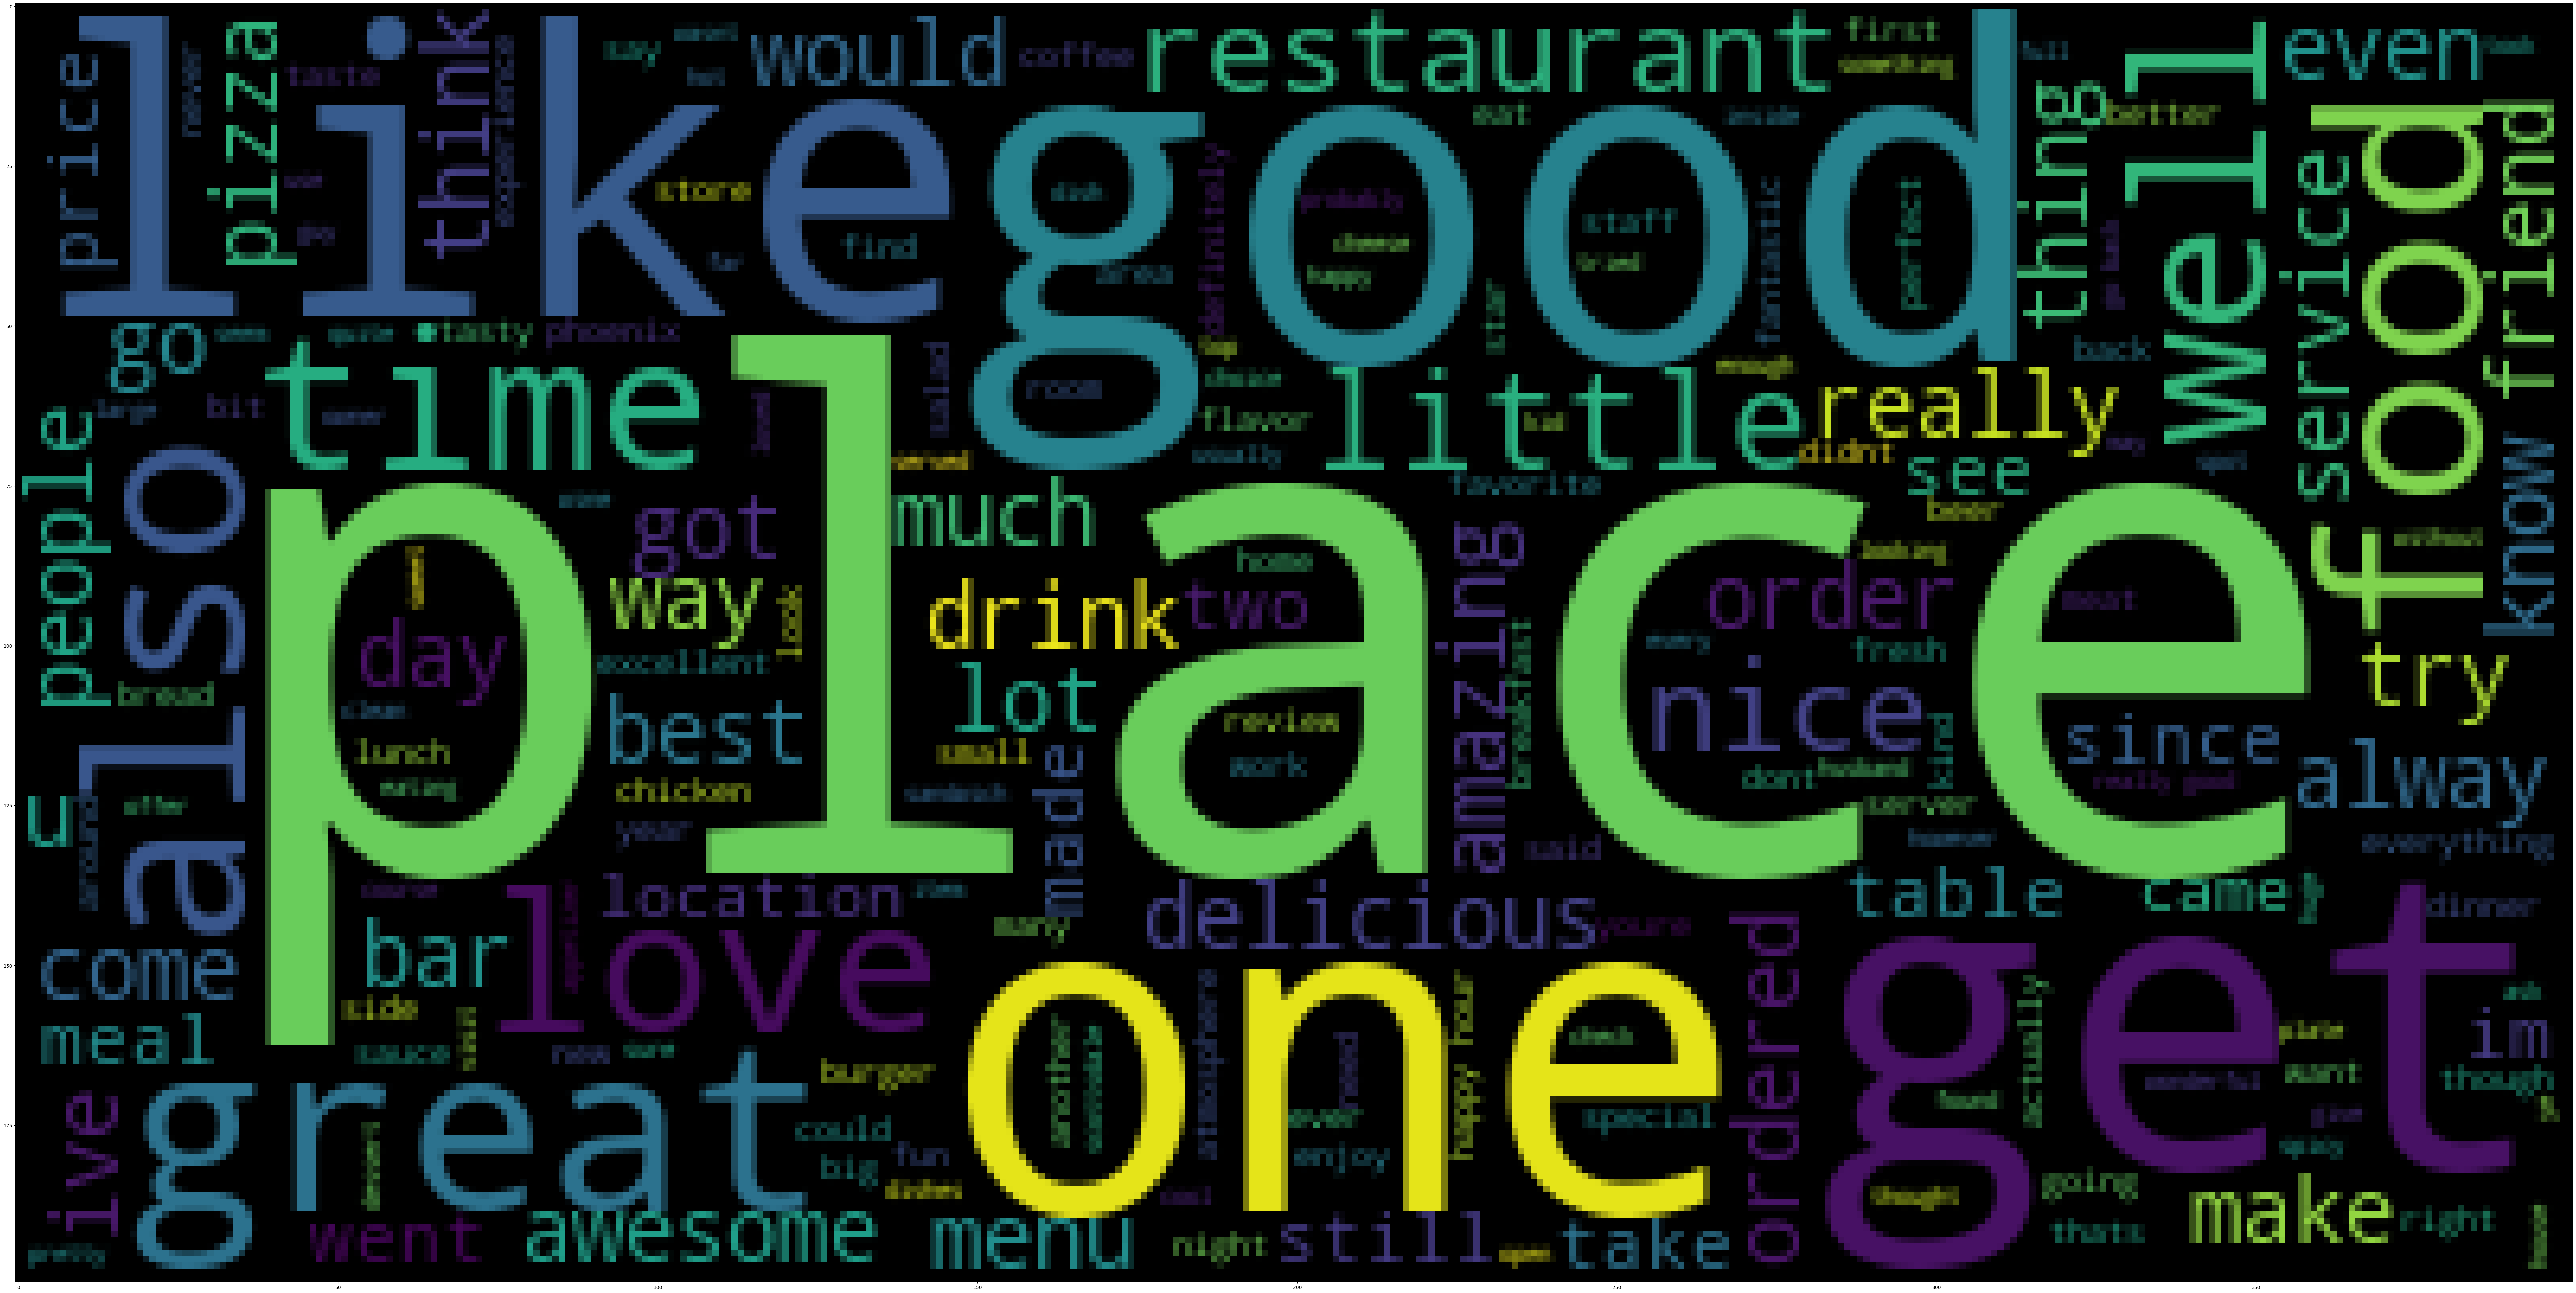

In [66]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist())) # Provide a single corpus

%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [67]:
Positive_review

0       wife took birthday breakfast excellent weather...
1       idea people give bad reviews place goes show p...
2       love gyro plate rice good also dig candy selec...
3       rosie dakota love chaparral dog park convenien...
4       general manager scott petello good egg go deta...
                              ...                        
9993    judging reviews maybe went good days ive enjoy...
9994    lets seewhat like surprise stadium well $ tall...
9996    called house deliciousness could go item item ...
9997    recently visited olive ivy business last week ...
9999    locations star average think arizona really fa...
Name: text, Length: 6863, dtype: object

In [68]:
#Train
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',
                             ngram_range=(1, 1 ), # Try to experiment with different n-grams
                             min_df=1, # min_df represents min. number of docs where the token can appear
                             encoding='latin-1' ,
                             max_features=800) # Max vocab that we want to define
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names_out())

In [69]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}',
                             ngram_range=(1, 1 ),
                             min_df=1,
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names_out())

In [70]:
Negative_review[15]

'worth $ salad small pizza absolutely bad service maybe guys grandma died dont know want tell really made mad experience order small pizza salad guys could cared less took $ sat looking around hmm theres sign saying x large pizza large salad $ wow would nice guy told us left hungry mad unsatisfied owner teach employees value upselling telling specials something small affect customers experience negatively salads severely overpriced wont go back unless im desperate'

In [71]:
Positive_review_dtm

,able,absolutely,across,actually,add,added,afternoon,ago,almost,along,...,years,yelp,yes,yet,youll,young,youre,youve,yum,yummy
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6859,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,0
6860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6861,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [72]:
Negative_review_dtm

,able,absolutely,across,actually,add,afternoon,ago,airport,almost,along,...,wrong,yeah,year,years,yelp,yes,yet,youll,youre,yummy
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

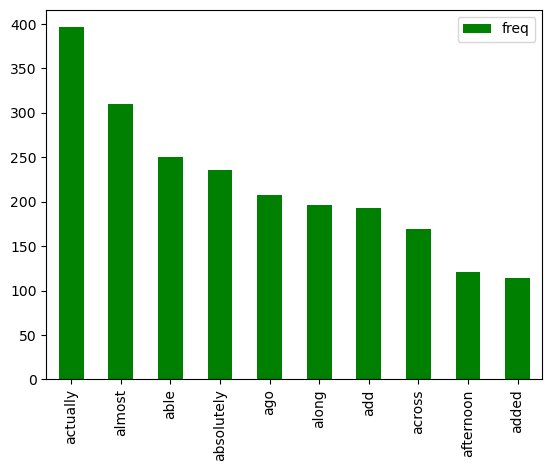

In [73]:
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='Green')

<Axes: >

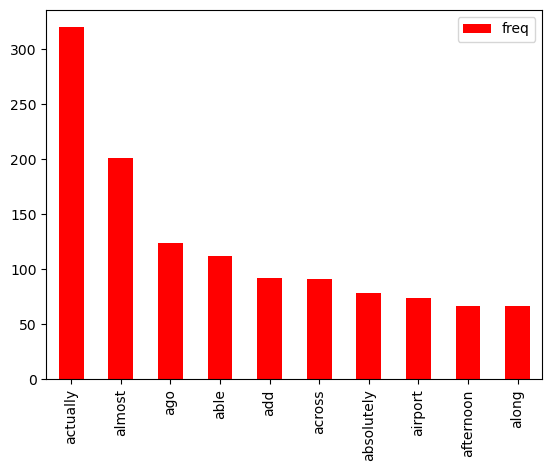

In [74]:
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq.plot(kind='bar', color='red')

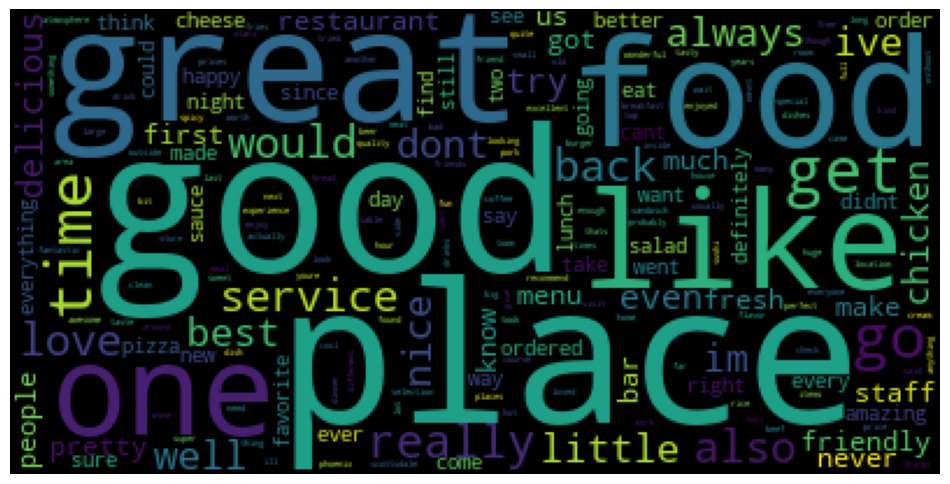

In [75]:
word_freq_dictionary = dict(Positive_review_dtm.apply(sum))

from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [76]:
word_freq_dictionary = dict(Negative_review_dtm.apply(sum))

In [77]:
word_freq_dictionary

{'able': 112,
 'absolutely': 79,
 'across': 91,
 'actually': 320,
 'add': 92,
 'afternoon': 67,
 'ago': 124,
 'airport': 74,
 'almost': 201,
 'along': 67,
 'already': 104,
 'also': 676,
 'although': 134,
 'always': 433,
 'amazing': 107,
 'ambiance': 74,
 'amount': 89,
 'another': 486,
 'anyone': 106,
 'anything': 268,
 'anyway': 98,
 'apparently': 58,
 'appetizer': 100,
 'area': 348,
 'arent': 82,
 'arizona': 81,
 'around': 433,
 'arrived': 139,
 'ask': 227,
 'asked': 417,
 'asking': 61,
 'ate': 137,
 'atmosphere': 190,
 'attention': 73,
 'attentive': 62,
 'authentic': 58,
 'available': 86,
 'average': 173,
 'avoid': 60,
 'away': 222,
 'awesome': 113,
 'awful': 91,
 'az': 61,
 'back': 1124,
 'bacon': 96,
 'bad': 571,
 'bag': 76,
 'bar': 585,
 'barely': 62,
 'bartender': 91,
 'based': 82,
 'basically': 55,
 'bathroom': 54,
 'bbq': 116,
 'beans': 109,
 'beef': 203,
 'beer': 258,
 'beers': 84,
 'behind': 103,
 'believe': 90,
 'best': 368,
 'better': 705,
 'big': 296,
 'bill': 146,
 'bit':

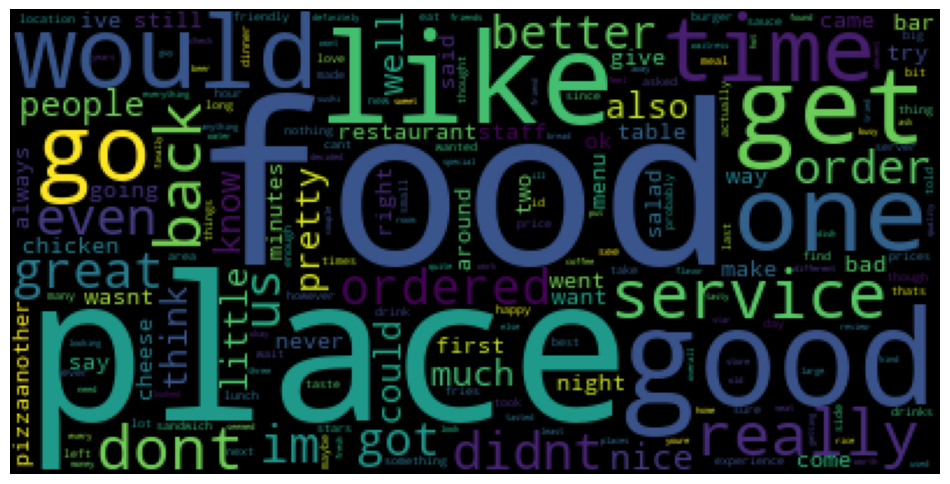

In [78]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [79]:
corr = Negative_review_dtm.corrwith(Negative_review_dtm.able) #word similarity

In [80]:
corr.sort_values(ascending=False)

able          1.000000
seemed        0.133606
bag           0.105974
front         0.105173
people        0.104734
                ...   
sandwiches   -0.024820
floor        -0.025889
typical      -0.027370
head         -0.027521
counter      -0.029956
Length: 800, dtype: float64

In [82]:
corr_docs = Negative_review_dtm.T.corrwith(Negative_review_dtm.T[0]) #document similarity

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [83]:
Negative_review_dtm.T[0]

able          0
absolutely    1
across        0
actually      0
add           0
             ..
yes           0
yet           0
youll         0
youre         0
yummy         0
Name: 0, Length: 800, dtype: int64

In [84]:
corr_docs.sort_values(ascending=False)

0       1.000000
612     0.375707
1645    0.352951
1741    0.303540
1051    0.293124
          ...   
1710   -0.049528
302    -0.050848
604          NaN
2028         NaN
2917         NaN
Length: 3137, dtype: float64

In [85]:
corr_docs

0       1.000000
1       0.121847
2       0.043672
3       0.130205
4       0.083768
          ...   
3132    0.055601
3133    0.063484
3134    0.114961
3135    0.017958
3136    0.043812
Length: 3137, dtype: float64

In [86]:
Negative_review.reset_index().iloc[0][1]

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\450624025.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Negative_review.reset_index().iloc[0][1]


'worth $ salad small pizza absolutely bad service maybe guys grandma died dont know want tell really made mad experience order small pizza salad guys could cared less took $ sat looking around hmm theres sign saying x large pizza large salad $ wow would nice guy told us left hungry mad unsatisfied owner teach employees value upselling telling specials something small affect customers experience negatively salads severely overpriced wont go back unless im desperate'

In [87]:
Negative_review.reset_index().iloc[612][1]

C:\Users\hp\AppData\Local\Temp\ipykernel_4044\3555249890.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Negative_review.reset_index().iloc[612][1]


'tried rare earth first time solo diner often good way get take new restaurant sat bar surprisingly uncomfortable seating really hard seats cut back knees wine selection nice big two three choices variety ordered glass wine small house salad pizza server behing bar professionally friendly wait began fifteen minutes passed still salad able get servers attention asked salad didnt check status salad gave excuse several people come around time minutes later salad pizza came time disappointing wanted eat salad didnt want pizza go cold note extremely thin pizzalike cracker crustso goes cold quickly server offered send pizza back keep hot since fresh tomato didnt want pizza ruined house salad fresh good mushrooms shaved pecorino cheese lots red onions dressing house vinaigrette strong vinegary onion vinegar overwhelming would order particular salad pizza good amount toppings held together pretty well even idering thin crust would like try restaurant several things menu sounded really good sta

Text Classification - binary classification

In [89]:
yelp['stars_new'] = np.where(yelp.stars>=4, 1,0)

In [90]:
yelp.stars_new.value_counts(normalize=True) # Some imbalance is there

stars_new
1    0.6863
0    0.3137
Name: proportion, dtype: float64

In [91]:
Y = yelp.stars # Multinomial classification
X = yelp.text

In [92]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=123)

In [93]:
train_X = train_X.apply(lambda x: clean_text(x))
train_X = pre_process(train_X)

test_X = test_X.apply(lambda x: clean_text(x))
test_X=pre_process(test_X)

In [94]:
test_X

2656    last night developing huge craving panang chic...
445     like others found studio living social coupon ...
9505    absolutely love ambiance romantic brick stone ...
332     read good reviews restaurant wanted try right ...
4168    agree timmy located roadhouse feel havent dinn...
                              ...                        
2708    car wash would highly recommend great job pay ...
8232    place christmas lights fair amount ambiance su...
5835    market bistro never leaves disappointed people...
6689    craving something last night couldnt figure wa...
577     favorite haunt whether st patricks day sundevi...
Name: text, Length: 3000, dtype: object

In [95]:
tfidf_vect = TfidfVectorizer(analyzer='word',
                             token_pattern=r'\w{1,}',
                             ngram_range=(1, 1 ),
                             min_df=5,
                             encoding='latin-1' ,
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_X)
X_test_tfidf = tfidf_vect.transform(test_X)

In [96]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

In [97]:
dtm_tfidf_train
dtm_tfidf_test

,able,absolutely,across,actually,add,added,addition,afternoon,ago,agree,...,yelp,yes,yet,yogurt,youll,young,youre,youve,yum,yummy
0,0.059025,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.059666,0.055843,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.141448,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.129525,0.130911,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.429442,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2996,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,0.000000,0.000000,0.128164,0.099574,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logit_model = LogisticRegression().fit(dtm_tfidf_train, train_y)

In [100]:
import sklearn

In [101]:
print(sklearn.metrics.classification_report(train_y, logit_model.predict(dtm_tfidf_train)))

              precision    recall  f1-score   support

           1       0.82      0.63      0.72       531
           2       0.76      0.42      0.54       631
           3       0.66      0.43      0.53      1030
           4       0.60      0.73      0.66      2446
           5       0.68      0.75      0.72      2362

    accuracy                           0.66      7000
   macro avg       0.71      0.59      0.63      7000
weighted avg       0.67      0.66      0.65      7000



In [102]:
print(sklearn.metrics.classification_report(test_y, logit_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.58      0.40      0.47       218
           2       0.47      0.23      0.30       296
           3       0.38      0.25      0.30       431
           4       0.49      0.59      0.53      1080
           5       0.57      0.65      0.61       975

    accuracy                           0.51      3000
   macro avg       0.50      0.42      0.44      3000
weighted avg       0.50      0.51      0.50      3000



In [103]:
from sklearn.svm import LinearSVC

In [104]:
lsvc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train, train_y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [105]:
import sklearn
print(sklearn.metrics.classification_report(train_y, lsvc_model.predict(dtm_tfidf_train)))

print(sklearn.metrics.classification_report(test_y, lsvc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82       531
           2       0.79      0.59      0.68       631
           3       0.70      0.54      0.61      1030
           4       0.65      0.70      0.67      2446
           5       0.70      0.77      0.73      2362

    accuracy                           0.70      7000
   macro avg       0.74      0.68      0.70      7000
weighted avg       0.70      0.70      0.70      7000

              precision    recall  f1-score   support

           1       0.47      0.42      0.44       218
           2       0.43      0.26      0.32       296
           3       0.34      0.27      0.30       431
           4       0.50      0.53      0.51      1080
           5       0.56      0.66      0.61       975

    accuracy                           0.50      3000
   macro avg       0.46      0.43      0.44      3000
weighted avg       0.49      0.50      0.49      3000



In [106]:
lsvc_model.predict(dtm_tfidf_test)

array([3, 4, 5, ..., 5, 3, 4], dtype=int64)

In [107]:
# inferenc - applying model on new data
rev = input()

 I like this place


In [108]:
clean_rev = ' '.join([i for i in clean_text(rev).split() if i not in stop ])

In [109]:
clean_rev

'like place'

In [110]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


1

In [111]:
train_X.shape

(7000,)

In [112]:
train_X.head()

3144    wife went sat patio near canal temperature per...
9939    brunch el chorro today wonderful patio comfort...
7925    love love love place tasty great prices beat n...
309     could give stars would thats ive joes real bbq...
9415    could would two reviews golf course self would...
Name: text, dtype: object

In [113]:
train_X.reset_index()

,index,text
0,3144,wife went sat patio near canal temperature per...
1,9939,brunch el chorro today wonderful patio comfort...
2,7925,love love love place tasty great prices beat n...
3,309,could give stars would thats ive joes real bbq...
4,9415,could would two reviews golf course self would...
...,...,...
6995,9785,wife well several friends drive ahwatukee regu...
6996,7763,dinner frank & alberts attending conference ho...
6997,5218,dont see big deal went soda machine broken foo...
6998,1346,dunno deal isbut terribly impressed pretzel fo...


In [114]:
pd.concat([train_X.reset_index(), dtm_tfidf_train],axis=1)

,index,text,able,absolutely,across,actually,add,added,addition,afternoon,...,yelp,yes,yet,yogurt,youll,young,youre,youve,yum,yummy
0,3144,wife went sat patio near canal temperature per...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,9939,brunch el chorro today wonderful patio comfort...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,7925,love love love place tasty great prices beat n...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,309,could give stars would thats ive joes real bbq...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,9415,could would two reviews golf course self would...,0.130623,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,9785,wife well several friends drive ahwatukee regu...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6996,7763,dinner frank & alberts attending conference ho...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.140851
6997,5218,dont see big deal went soda machine broken foo...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6998,1346,dunno deal isbut terribly impressed pretzel fo...,0.000000,0.0,0.0,0.221485,0.0,0.0,0.0,0.0,...,0.0,0.245811,0.0,0.0,0.0,0.0,0.217428,0.0,0.0,0.000000


In [115]:
dtm_tfidf_train

,able,absolutely,across,actually,add,added,addition,afternoon,ago,agree,...,yelp,yes,yet,yogurt,youll,young,youre,youve,yum,yummy
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.130623,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6996,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.140851
6997,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6998,0.000000,0.0,0.0,0.221485,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.245811,0.0,0.0,0.0,0.0,0.217428,0.0,0.0,0.000000


In [116]:
dtm_tfidf_train

,able,absolutely,across,actually,add,added,addition,afternoon,ago,agree,...,yelp,yes,yet,yogurt,youll,young,youre,youve,yum,yummy
0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4,0.130623,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6996,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.140851
6997,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6998,0.000000,0.0,0.0,0.221485,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.245811,0.0,0.0,0.0,0.0,0.217428,0.0,0.0,0.000000


In [117]:
#inferenc - applying model on new data
rev = input()

 This place is Awsome


In [118]:
rev

'This place is Awsome'

In [119]:
clean_rev = ' '.join([i for i in clean_text(rev).split() if i not in stop ])

In [120]:
clean_rev

'place awsome'

In [121]:
lsvc_model.predict(tfidf_vect.transform(pd.Series(clean_rev)))[0]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


1

Text Recommendation (Similarity between documents)

In [122]:
from sklearn.metrics.pairwise import cosine_similarity
dist = cosine_similarity(dtm_tfidf_train)

In [123]:
train_X

3144    wife went sat patio near canal temperature per...
9939    brunch el chorro today wonderful patio comfort...
7925    love love love place tasty great prices beat n...
309     could give stars would thats ive joes real bbq...
9415    could would two reviews golf course self would...
                              ...                        
9785    wife well several friends drive ahwatukee regu...
7763    dinner frank & alberts attending conference ho...
5218    dont see big deal went soda machine broken foo...
1346    dunno deal isbut terribly impressed pretzel fo...
3582    feels lot like thats wrap used location love o...
Name: text, Length: 7000, dtype: object

In [124]:
dist

array([[1.        , 0.06839581, 0.        , ..., 0.04729888, 0.        ,
        0.03974165],
       [0.06839581, 1.        , 0.        , ..., 0.04634989, 0.02138066,
        0.03920556],
       [0.        , 0.        , 1.        , ..., 0.02680495, 0.04530466,
        0.25219498],
       ...,
       [0.04729888, 0.04634989, 0.02680495, ..., 1.        , 0.05683402,
        0.11896231],
       [0.        , 0.02138066, 0.04530466, ..., 0.05683402, 1.        ,
        0.0536958 ],
       [0.03974165, 0.03920556, 0.25219498, ..., 0.11896231, 0.0536958 ,
        1.        ]])

In [125]:
len(['d_'+str(i) for i in train_X.index])

7000

In [126]:
dist = pd.DataFrame(dist, index =  train_X.index, columns = ['d_'+str(i) for i in train_X.index])

In [127]:
dist

,d_3144,d_9939,d_7925,d_309,d_9415,d_7765,d_7436,d_1725,d_7897,d_2319,...,d_6782,d_6257,d_96,d_5857,d_7382,d_9785,d_7763,d_5218,d_1346,d_3582
3144,1.000000,0.068396,0.000000,0.090600,0.051305,0.047772,0.040806,0.073825,0.144515,0.000000,...,0.053777,0.013903,0.077914,0.063209,0.000000,0.091429,0.099739,0.047299,0.000000,0.039742
9939,0.068396,1.000000,0.000000,0.026655,0.025205,0.044517,0.000000,0.035480,0.036689,0.039396,...,0.019343,0.000000,0.174882,0.000000,0.000000,0.014198,0.114592,0.046350,0.021381,0.039206
7925,0.000000,0.000000,1.000000,0.029127,0.089730,0.109433,0.043466,0.016409,0.047203,0.037020,...,0.016608,0.033895,0.066211,0.087438,0.000000,0.100268,0.055930,0.026805,0.045305,0.252195
309,0.090600,0.026655,0.029127,1.000000,0.106585,0.026508,0.005639,0.075745,0.084902,0.010864,...,0.063759,0.023366,0.056261,0.031509,0.051131,0.047859,0.049052,0.050618,0.085695,0.066777
9415,0.051305,0.025205,0.089730,0.106585,1.000000,0.138762,0.036672,0.023438,0.090247,0.061626,...,0.088468,0.053687,0.064933,0.062021,0.000000,0.031480,0.102967,0.064814,0.000000,0.058657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,0.091429,0.014198,0.100268,0.047859,0.031480,0.000000,0.000000,0.040314,0.108252,0.000000,...,0.000000,0.058406,0.075165,0.055780,0.032318,1.000000,0.039685,0.108954,0.008847,0.031850
7763,0.099739,0.114592,0.055930,0.049052,0.102967,0.000000,0.034362,0.207754,0.019552,0.019918,...,0.092834,0.048399,0.137780,0.051106,0.061895,0.039685,1.000000,0.019447,0.040409,0.046631
5218,0.047299,0.046350,0.026805,0.050618,0.064814,0.017317,0.077673,0.009687,0.030628,0.000000,...,0.000000,0.008813,0.000000,0.000000,0.016487,0.108954,0.019447,1.000000,0.056834,0.118962
1346,0.000000,0.021381,0.045305,0.085695,0.000000,0.071107,0.000000,0.030184,0.022180,0.000000,...,0.034410,0.000000,0.000000,0.000000,0.074961,0.008847,0.040409,0.056834,1.000000,0.053696


In [128]:
top_recs = dist.sort_values(by='d_3144', ascending=False)['d_3144'][1:6]   #Top 5 documents for given document-3144

In [ ]:
top_recs